Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


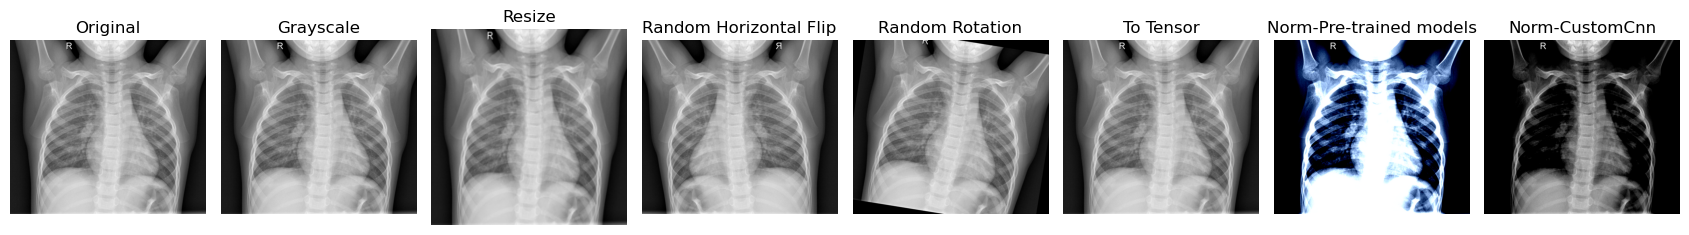

In [ ]:
import os
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt 
from torchvision import datasets 
import torch 
import numpy as np
 
img_path = './Testimages/IM-0115-0001.jpeg'
Original_image = Image.open(img_path).convert("RGB")

 
transformations = [
    ("Original", None),
    ("Grayscale", transforms.Grayscale(num_output_channels=3)),
    ("Resize", transforms.Resize((224, 224))),
    ("Random Horizontal Flip", transforms.RandomHorizontalFlip(p=1.0)),  
    ("Random Rotation", transforms.RandomRotation(10)),
    ("To Tensor", transforms.ToTensor()),
    ("Norm-Pre-trained models", transforms.Compose([

        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])), 
    
    ("Norm-CustomCnn", transforms.Compose([
        transforms.ToTensor(), 
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
        
    ]))
]

 
fig, axes = plt.subplots(1, len(transformations), figsize=(17, 5))

for ax, (name, transform) in zip(axes, transformations):
    if transform is None:
        transformed_image = Original_image
    else:
        transformed_image = transform(Original_image)

   
    if isinstance(transformed_image, Image.Image):  # PIL Image
        ax.imshow(transformed_image)
    else:   
        ax.imshow(transformed_image.permute(1, 2, 0).numpy(), cmap="gray")
    
    ax.set_title(name)
    ax.axis('off')

plt.tight_layout()
plt.show()


'./Testimages/IM-0115-0001.jpeg'

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(),         
    #transforms.Normalize(mean=[0.5], std=[0.5])  # Example normalization for grayscale
])


In [61]:

data_dir = './Datasets/LungXRays-grayscale'
train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=transform)
val_dataset = datasets.ImageFolder(os.path.join(data_dir, 'val'), transform=transform)
test_dataset = datasets.ImageFolder(os.path.join(data_dir, 'test'), transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True)




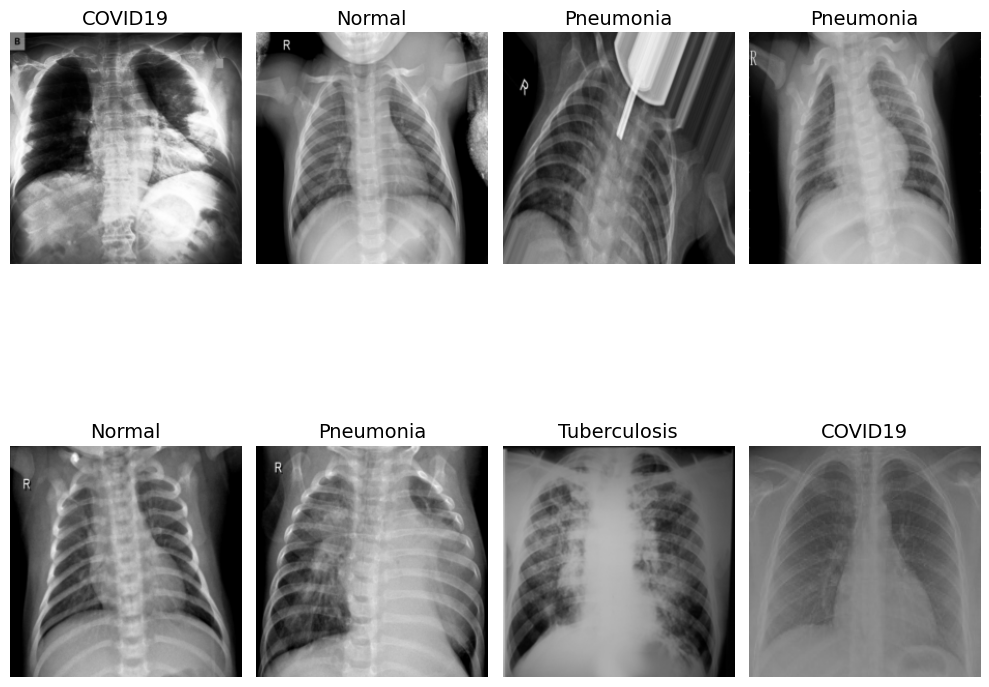

In [ ]:
def imshow(img, title=None):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap="gray")   
    if title:
        plt.title(title, fontsize=8)
    plt.axis("off")

dataiter = iter(train_loader)
images, labels = next(dataiter)
class_names = train_dataset.classes

plt.figure(figsize=(10, 10))
for idx in range(len(images)):
    plt.subplot(2, 4, idx + 1)  
    plt.title(class_names[labels[idx]], fontsize=14)
    imshow(images[idx])
plt.tight_layout()
plt.show()
